In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Day 26: Dynamical Systems


We've seen dynamical systems earlier this semester. As a reminder, we are interested in the evolution of a state vector $\vec{x}$ over discrete time periods, where the elements of $\vec{x}$ change according to a transition matrix $A$ which remains constant. Such systems have lots of applications from biology and ecology, economics, brain modeling, epidemiology, modeling changes of opinion over time, evolution and genetic drift, and more.

Through the first half of this notebook, we'll use an example involving the spread of a conspiracy theory throughout a population as motivation. Our focus will be on the long-run behavior of the state vector. The second half of the notebook will investigate different scenarios for long-run behavior of solutions, including stable solutions, unstable solutions, and cyclical solutions.

Before we proceed, a few definitions are in order.

> **Definition (Fixed Point / Steady State):** Given a discrete dynamical system $\vec{x_{k+1}} = A\vec{x_k}$, a *fixed point* (or *steady state*) is a vector $\vec{x^*}$ such that $A\vec{x^*} = \vec{x^*}$.
>
>> **Note (Finding Steady States):** Every discrete dynamical system has at least one *steady state* -- the zero vector. It is possible for additional steady states to exist though. Since the steady state satisfies $A\vec{x^*} = \vec{x^*}$, we must have the following:
>> \begin{align*} A\vec{x^*} &= \vec{x^*}\\
\implies A\vec{x^*} - \vec{x^*} &= \vec{0}\\
\implies \left(A - I\right)\vec{x^*} &= \vec{0}
\end{align*}
>> This means that the *steady state* vector is an eigenvector corresponding to an eigenvalue of $\lambda = 1$.

> **Definition (Long-Run Behavior):** Given a discrete dynamical system $\vec{x_{k+1}} = A\vec{x_k}$, the long-run behavior of a solution (sequence of state vectors) beginning from initial state $\vec{x_0}$ is determined by $\displaystyle{\lim_{k\to \infty}{A^k\vec{x_0}} = \lim_{k\to \infty}{A\vec{x_k}}}$

### A Motivating Example

> **Example:** A new conspiracy is circulating throughout a population.
>
> <center>
> “The flouride that the government adds to our water is actually a remotely activated mind control serum.”
> </center>
>
> This idea, bizarre as it sounds, begins to gain traction online. Some citizens become believers, while others remain skeptical. Skeptics find conspiracy theory so outlandish that even they still talk about it — reposting memes, debunking videos, or arguing in the comments section. Believers, of course, continue to discuss the fluoride conspiracy, attempting to convince others that it's not a conspiracy at all -- it's real!
>
> Over time, these two groups influence one another: some *skeptics* fall down the rabbit hole, while some *believers* stop believing in the conspiracy theory either because of exposure to reliable information, boredom with the conspiracy, or otherwise.
>
> We measure time in days, and estimate the following transitions from one day to the next.
>
> + Within the community of *believers*, 85% will remain *believers*, while the remaining 15% will return to a *skeptical* standpoint.
> + Within the community of *skeptics*, 90% will remain *skeptical* while the remaining 10% will begin *believing* in the conspiracy.
>
> A group studying the conspiracy has further estimated that, currently, 5% of the population are *believers* The group is interested in modeling the spread of the conpiracy in the immediate future and then estimating the proportion of the population who will believe in the conspiracy in the long run.

We'll analyze the scenario and help the researchers throughout this notebook.

>> **Comment:** Since this notebook is another notebook where our primary focus will be on numerical computations, we'll utilize `{numpy}` rather than `{sympy}`. Below are descriptions of the `{numpy}` functionality we'll need.
>>
>> + We create vectors and matrices using `np.array()`
>> + We perform matrix multiplication using `np.matmul()`
>> + We calculate *eigenvalues* and *eigenvectors* using `np.linalg.eig()`

**Task 1:** Write the initial state vector $\vec{x_0}$ and the transition matrix $A$.

In [ ]:
x0 = np.array([[0.95], [0.05]])

A = np.array([[0.90, 0.15],
              [0.10, 0.85]])

**Task 2:** Calculate the proportion of *believers* and *skeptics* on Day 1, Day 2, and Day 3.

In [ ]:
x1 = np.matmul(A, x0)
x2 = np.matmul(A, x1)
x3 = np.matmul(A, x2)

print("Day 1:", x1)
print("Day 2:", x2)
print("Day 3:", x3)

Day 1: [[0.8625]
 [0.1375]]
Day 2: [[0.796875]
 [0.203125]]
Day 3: [[0.74765625]
 [0.25234375]]


**Task 3:** Use the code block below to Calculate the proportions of *believers* and *skeptics* over the first 60 days (approximately two months) and plot the results. Discuss what you are seeing.

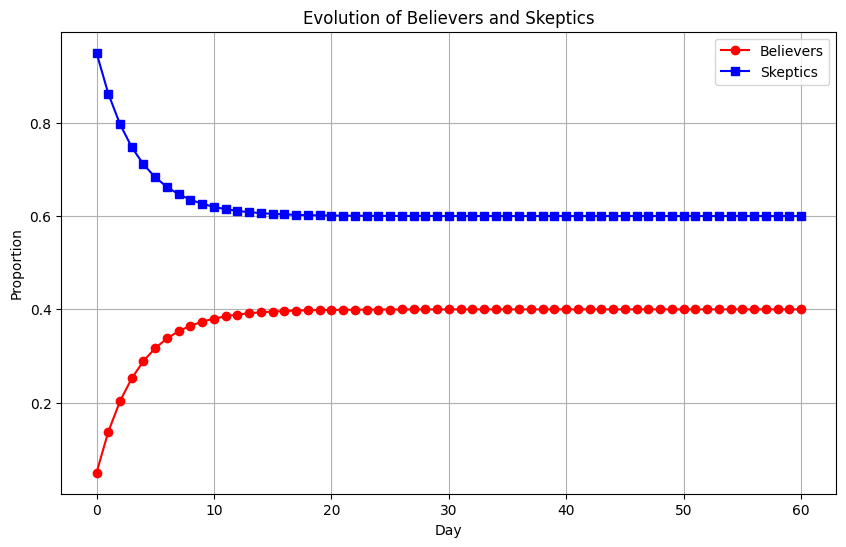

In [ ]:
def iterate_system(A, x0, steps):
    states = [x0]
    for _ in range(steps):
        x_next = np.matmul(A, states[-1])
        states.append(x_next)

    states = np.array(states)

    return states

states = iterate_system(A, x0, 60)
skeptics = states[:, 0]
believers = states[:, 1]
days = range(60 + 1)

plt.figure(figsize=(10, 6))
plt.plot(days, believers, marker='o', color = "red", label='Believers')
plt.plot(days, skeptics, marker='s', color = "blue", label='Skeptics')
plt.title('Evolution of Believers and Skeptics')
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.legend()
plt.grid()
plt.show()

**Task 4:** Analyse the results further to calculate the proportion of *believers* and *skeptics* in the steady state (long-run). Do this by following the steps below.

+ Calculate the eigenvectors of the matrix $A$
+ Calculate the eigenvalues of the matrix $A$
+ Determine an eigenbasis for $\mathbb{R}^2$
+ Rewrite the initial state vector $\vec{x_0}$ as a linear combination of the vectors in the eigenbasis
+ Construct an expression for $\vec{x_{k+1}}$ given $\vec{x_k}$ that does not require matrix multiplication
+ Use what you know about *limits* (reach way back to Calculus I) to determine the state vector in the long-run by calculating $\displaystyle{\lim_{k\to \infty}{\vec{x_k}}}$

In [ ]:
np.linalg.eig(A)

EigResult(eigenvalues=array([1.  , 0.75]), eigenvectors=array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))

In [ ]:
import sympy as sp

P = sp.Matrix([[0.8, -np.sqrt(2)/2, 0.95], [0.6, np.sqrt(2)/2, 0.05]])
P.rref()

(Matrix([
 [1, 0,  0.714285714285714],
 [0, 1, -0.535380848612672]]),
 (0, 1))

In [ ]:
def iterate_system_eig(n_its = 60):
  term1 = (1**n_its)*((0.714285714285714)*np.array([0.8, 0.6]))
  term2 = (0.65**n_its)*(0.535380848612672*np.array([-np.sqrt(2), np.sqrt(2)]))
  return term1 + term2

iterate_system_eig()

array([0.57142857, 0.42857143])

In [ ]:
iterate_system_eig(100)

array([0.57142857, 0.42857143])

**Task 5:** Discuss any advantages or disadvantages you see to using this second, eigenvector/value approach rather than using the original approach via iterated matrix multiplication.

**Task 6:** Determine whether the initial distribution of *believers* and *skeptics* has any influence over the long-run, steady state.

### Section II

Having explored a discrete dynamical system, we are now prepared to investigate lots of interesting questions about discrete dynamical systems in general.

+ Is it always the case that a discrete dynamical system will converge to a single, stable steady state?
+ Is it possible that there are multiple different steady states and the one we arrive at is determined by the initial state?
+ If an initial state is "near" the steady state, will the system always converge to that nearby steady state?
+ Is it possible for a system to have no steady state for at least some initial state(s)?
+ Is it possible that we land in a cycle of states rather than a single steady state?
+ If at least some of these alternatives are possible, can we determine what type of behavior a discrete dynamical system will exhibit by analysing the transition matrix?

#### Eigenvalues and Characteristics of Solutions

A *solution* to a discrete dynamical system $\vec{x_{k+1}} = A\vec{x_k}$ is a sequence of state vectors. The characteristics/behavior of these solutions is determined by the eigenvalues corresponding to the matrix $A$.

+ If $\left|\lambda\right| < 1$ for all eigenvalues, then the system has a globally attractive *fixed point* at $\vec{0}$ -- all solutions converge to $\vec{0}$
+ If $\lambda = 1$ is an eigenvalue, then any vector in $E_\lambda$ (the eigenspace corresponding to $\lambda = 1$) is a *fixed point*.
+ If any eigenvalue $\lambda$ has $\left|\lambda\right| = 1$ and no eigenvalue has $\left|\lambda\right| > 1$, then the some solutions may oscillate or rotate but not converge to a fixed point.
+ If any eigenvalue $\lambda$ satisfies $\left|\lambda\right| > 1$, then solutions grow in magnitude along the directions associated with those eigenvalues and $\vec{0}$ becomes an unstable steady state (solutions are repelled from $\vec{0}$ unless they start exactly at $\vec{0}$).
+ If some eigenvalues satisfy $\left|\lambda\right| < 1$ and others satisfy $\left|\lambda\right| > 1$, then $\vec{0}$ is a *saddle point* and solutions are attracted to $\vec{0}$ along some directions byt repelled from it along others.

### Analyzing Our Conspiracy

We know that the discrete dynamical system and initial state we used to model the spread of our conspiracy landed us into a steady state. Let's take another look at how that conspiracy theory spread through our population.

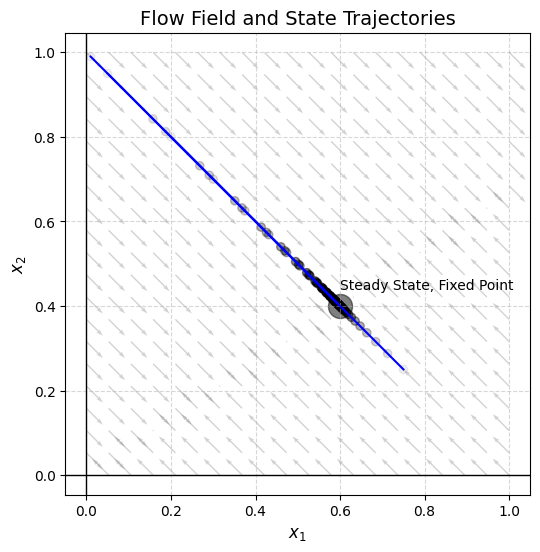

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define the system
A = np.array([[0.90, 0.15],
              [0.10, 0.85]])

def iterate_system(A, x0, steps):
    x = x0
    results = [x0.flatten()]
    for _ in range(steps):
        x = A @ x
        results.append(x.flatten())
    return np.array(results)

# Initial states for trajectories
initial_states = [
    np.array([[.01], [0.99]]),
    np.array([[0.05], [0.95]]),
    np.array([[0.20], [0.80]]),
    np.array([[0.50], [0.50]]),
    np.array([[0.75], [0.25]]),
]
steps = 15

# Set up the plot
plt.figure(figsize=(6, 6))

# Flow field: grid of points and their update directions
x_vals = np.linspace(0, 1, 20)
y_vals = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x_vals, y_vals)

U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([[X[i, j]], [Y[i, j]]])
        new_vec = A @ vec
        diff = new_vec - vec
        U[i, j], V[i, j] = diff.flatten()

# Normalize vectors for display
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude + 1e-8
V /= magnitude + 1e-8

plt.quiver(X, Y, U, V, angles='xy', scale=20, color='gray', alpha=0.35)

# Plot solution trajectories
for x0 in initial_states:
    states = iterate_system(A, x0, steps)
    states = np.hstack((states, np.array(list(range(steps + 1))).reshape(-1, 1)))
    plt.plot(states[:, 0], states[:, 1], color = "blue")
    plt.scatter(x = states[:, 0], y = states[:, 1], color = "black", alpha = (states[:, 2] + 1)/(steps + 1))


plt.scatter(0.6, 0.4, color = "black", s = 300, alpha = 0.5)

# Eigenvectors (scaled for visibility)
#plt.arrow(0, 0, 40, 20, head_width=4, head_length=6, fc='black', ec='black')
#plt.text(45, 22, 'Eigenvector ~ [2, 1]', fontsize=10)

#plt.arrow(0, 0, -20, 20, head_width=4, head_length=6, fc='gray', ec='gray')
#plt.text(-80, 22, 'Other eigenvector', fontsize=10, color='gray')

# Formatting
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Flow Field and State Trajectories', fontsize=14)
plt.annotate("Steady State, Fixed Point", (0.6, 0.44))
#plt.legend()
plt.axis('equal')

plt.show()

**Task 1:** Determine the Eigenvalues corresponding to the matrix $A = \begin{bmatrix} 0.90 & 0.15\\ 0.10 & 0.85\end{bmatrix}$ and compare what we observed to the claimed behaviors in the bulleted list above.

In [ ]:
# @title
A = np.array([[0.90, 0.15],
              [0.10, 0.85]])

A_eig = np.linalg.eig(A)

for i in range(len(A_eig)):
    print(f"Eigenvalue: {A_eig[0][i]}")
    print(f"Eigenvector: {A_eig[1][:, i]}")

Eigenvalue: 1.0
Eigenvector: [0.83205029 0.5547002 ]
Eigenvalue: 0.75
Eigenvector: [-0.70710678  0.70710678]


**Task 2:** Consider the state transition matrices below. For each one, find any fixed points, identify all of the eigenvalues and eigenvectors for the matrix, and then plot the flow field and the first few states in several solution trajectories. Does what you are seeing match your expectations?

$$(i)~~A_1 = \begin{bmatrix} 0.9 & 0.8\\ 0.2 & 0.9\end{bmatrix}~~~~~(ii)~~A_2 = \begin{bmatrix} 1.2 & 0.3\\ 1.1 & 0.1\end{bmatrix}~~~~~(iii)~~A_3 = \begin{bmatrix} 0.5 & 0.2\\ 0.1 & 0.4\end{bmatrix}$$

$$(iv)~~A_4 = \begin{bmatrix} 1.2 & 0.3\\ 0.1 & 1.1\end{bmatrix}~~~~~(v)~~A_5 = \begin{bmatrix} 0.8 & -0.6\\ 0.1 & 0.8\end{bmatrix}$$

#### $A_1$ an Example of Populations for Cooperative Species

If we think of our state vectors $\vec{x} = \begin{bmatrix} p_1\\ p_2\end{bmatrix}$, where $p_1$ is the population of *species 1* and $p_2$ is the population of *species 2*, then the state transition matrix $A_1$ could possibly be used in modeling a cooperative relationship between these two species. Notice that all of the matrix entries are positive, indicating that the presence of the second species is beneficial to the first, and vice-versa.

In [ ]:
# @title
A = np.array([[0.9, 0.8],
              [0.2, 0.9]])

A_eig = np.linalg.eig(A)

for i in range(len(A_eig)):
    print(f"Eigenvalue: {A_eig[0][i]}")
    print(f"Eigenvector: {A_eig[1][:, i]}")

Eigenvalue: 1.3
Eigenvector: [0.89442719 0.4472136 ]
Eigenvalue: 0.4999999999999999
Eigenvector: [-0.89442719  0.4472136 ]


Notice that there are two distinct, real eigenvectors $\lambda_1 = 1.3$ and $\lambda_2 = 0.5$. This means that $\vec{0}$ is a *saddle point* -- that is, it is an attractor for some initial states and is repulsive to others.

The magnitude of the eigenvalues tells the complete story. Any initial state within $E_{\lambda = 0.5}$ (the eigenspace corresponding to $\lambda = 0.5$) will converge to the steady state, $\vec{0}$. Any initial state within $E_{\lambda = 1.3}$ will be repelled from the origin (without changing directions). The remaining initial states will result in vectors of growing magnitudes, gravitating towards the direction of the eigenvector corresponding to $\lambda = 1.3$ (which is the dominant eigenspace because the eigenvalue is largest and the eigenvalue corresponding to the other eigenvector has magnitude less than $1$). Note that these solutions, however, will not join the eigenspace...just approach it in their limit.

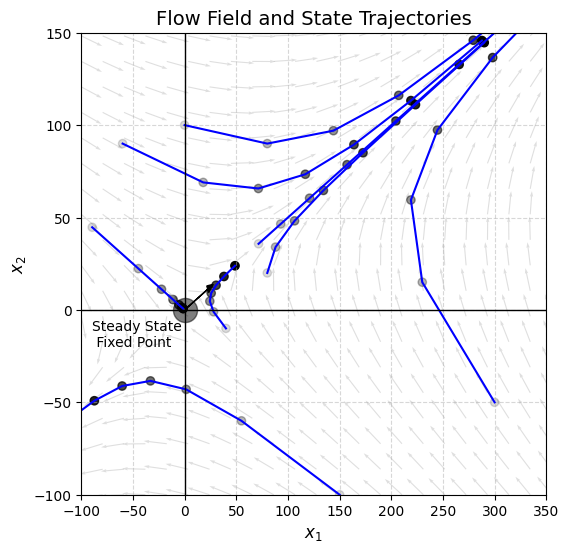

In [ ]:
# @title
# Define the system
A = np.array([[0.9, 0.8],
              [0.2, 0.9]])

# Initial states for trajectories
initial_states = [
    np.array([[-60.0], [90.0]]),
    np.array([[40.0], [-10.0]]),
    np.array([[80.0], [20.0]]),
    np.array([[0.0], [100]]),
    np.array([[300.0], [-50]]),
    np.array([[150.0], [-100]]),
    80*np.array([[0.89442719], [0.4472136]]),
    100*np.array([[-0.89442719], [0.4472136]]),
]
steps = 6

# Set up the plot
plt.figure(figsize=(6, 6))

# Flow field: grid of points and their update directions
x_vals = np.linspace(-100, 500, 30)
y_vals = np.linspace(-100, 300, 30)
X, Y = np.meshgrid(x_vals, y_vals)

U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([[X[i, j]], [Y[i, j]]])
        new_vec = A @ vec
        diff = new_vec - vec
        U[i, j], V[i, j] = diff.flatten()

# Normalize vectors for display
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude + 1e-8
V /= magnitude + 1e-8

plt.quiver(X, Y, U, V, angles='xy', scale=20, color='gray', alpha=0.25)

# Plot solution trajectories
for x0 in initial_states:
    states = iterate_system(A, x0, steps)
    states = np.hstack((states, np.array(list(range(steps + 1))).reshape(-1, 1)))
    plt.plot(states[:, 0], states[:, 1], color = "blue")
    plt.scatter(x = states[:, 0], y = states[:, 1], color = "black", alpha = (states[:, 2] + 1)/(steps + 1))

# Eigenvectors (scaled for visibility)
plt.arrow(0, 0, 25*(0.89442719), 25*0.4472136, head_width=4, head_length=6, fc='black', ec='black')

plt.arrow(0, 0, 12.5*(-0.89442719), 12.5*(0.4472136), head_width=4, head_length=6, fc='gray', ec='gray')

plt.scatter(0, 0, color = "black", s = 300, alpha = 0.5)
plt.annotate("Steady State\n Fixed Point", (-90, -20))

# Formatting
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Flow Field and State Trajectories', fontsize=14)
#plt.axis('equal')
plt.xlim((-100, 350))
plt.ylim((-100, 150))

plt.show()

**Question:** If we were to consider this a model of population dynamics, what are some unreasonable aspects of the model?

#### $A_2$

We'll consider the state transition matrix $A_2 = \begin{bmatrix} 1.2 & 0.3\\ 1.10 & 0.10\end{bmatrix}$, and start by finding the eigenvectors and eigenvalues of the matrix.

In [ ]:
# @title
A = np.array([[1.2, 0.3],
              [1.1, 0.1]])

A_eig = np.linalg.eig(A)

for i in range(len(A_eig)):
    print(f"Eigenvalue: {A_eig[0][i]}")
    print(f"Eigenvector: {A_eig[1][:, i]}")

Eigenvalue: 1.4452986860293433
Eigenvector: [0.77415438 0.63299684]
Eigenvalue: -0.14529868602934334
Eigenvector: [-0.2176527   0.97602628]


Notice that we've got two distinct eigenvalues, one with magnitude (absolute value) exceeding $1$ and the other below $1$. Initial states in the eigenspace corresponding to the negative eigenvalue will be attracted to the fixed point at $\vec{0}$ because that eigenvalue has a magnitude below $1$. Initial states within the other eigenspace will be repelled by the fixed point at $\vec{0}$ -- no matter how close to $\vec{0}$ we begin, the solution sequence of state vectors will move away from that fixed point.

A particularly interesting behavior is that, because of the presence of the negative eigenvalue, some solution sequences will initially oscillate across the fixed point at $\vec{0}$. As in the previous case, eventually all solutions which are not initially within $E_{\lambda = -0.145\cdots}$ will be attracted to the direction of the eigenvector corresponding to the eigenvalue whose magnitude exceeds $1$ (though they will not actually join that eigenspace), and will result in a solution sequence whose subsequent states are pushed further and further from the origin in this direction.

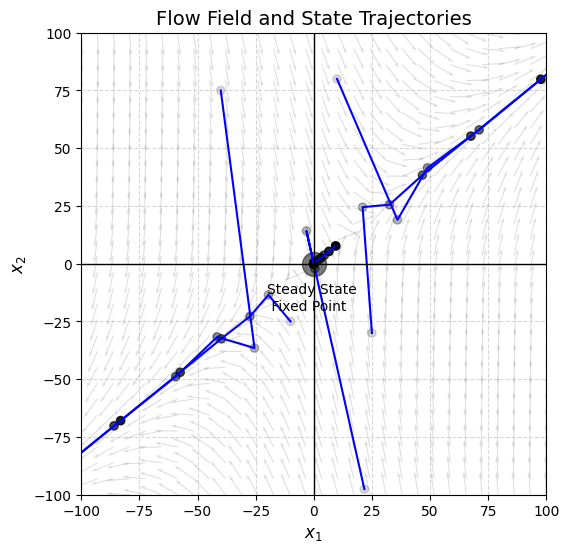

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define the system
A = np.array([[1.2, 0.3],
              [1.1, 0.1]])

def iterate_system(A, x0, steps):
    x = x0
    results = [x0.flatten()]
    for _ in range(steps):
        x = A @ x
        results.append(x.flatten())
    return np.array(results)

# Initial states for trajectories
initial_states = [
    np.array([[0.0], [0.0]]),
    np.array([[10.0], [80.0]]),
    np.array([[-10.0], [-25.0]]),
    np.array([[1.0], [1]]),
    np.array([[25.0], [-30]]),
    np.array([[-40.0], [75]]),
    #np.array([[-10.0], [50]]),
    -100*np.array([[-0.2176527], [0.97602628]])
]
steps = 6

# Set up the plot
plt.figure(figsize=(6, 6))

# Flow field: grid of points and their update directions
x_vals = np.linspace(-100, 100, 30)
y_vals = np.linspace(-100, 100, 30)
X, Y = np.meshgrid(x_vals, y_vals)

U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([[X[i, j]], [Y[i, j]]])
        new_vec = A @ vec
        diff = new_vec - vec
        U[i, j], V[i, j] = diff.flatten()

# Normalize vectors for display
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude + 1e-8
V /= magnitude + 1e-8

plt.quiver(X, Y, U, V, angles='xy', scale=20, color='gray', alpha=0.25)

# Plot solution trajectories
for x0 in initial_states:
    states = iterate_system(A, x0, steps)
    states = np.hstack((states, np.array(list(range(steps + 1))).reshape(-1, 1)))
    plt.plot(states[:, 0], states[:, 1], color = "blue")
    plt.scatter(x = states[:, 0], y = states[:, 1], color = "black", alpha = (states[:, 2] + 1)/(steps + 1))

# Eigenvectors (scaled for visibility)
#plt.arrow(0, 0, 40, 20, head_width=4, head_length=6, fc='black', ec='black')
#plt.text(55, 15, 'Eigenvector ~ [2, 1]', fontsize=10)

#plt.arrow(0, 0, -20, 20, head_width=4, head_length=6, fc='gray', ec='gray')
#plt.text(-100, 30, 'Other eigenvector', fontsize=10, color='gray')

# Formatting
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.scatter(0, 0, color = "black", s = 300, alpha = 0.5)
plt.annotate("Steady State\n Fixed Point", (-20, -20))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.title('Flow Field and State Trajectories', fontsize=14)
#plt.axis('equal')

plt.show()


#### $A_3$

Similarly, we'll start by identifying the eigenvectors and eigenvalues of the state transition matrix $A_3 = \begin{bmatrix} 0.5 & 0.2\\ 0.1 & 0.4\end{bmatrix}$.

In [ ]:
# @title
A = np.array([[0.5, 0.2],
              [0.1, 0.4]])

A_eig = np.linalg.eig(A)

for i in range(len(A_eig)):
    print(f"Eigenvalue: {A_eig[0][i]}")
    print(f"Eigenvector: {A_eig[1][:, i]}")

Eigenvalue: 0.6
Eigenvector: [0.89442719 0.4472136 ]
Eigenvalue: 0.3
Eigenvector: [-0.70710678  0.70710678]


Notice that both eigenvalues are real and are less than $1$. This indicates that the transformation resulting from left-multiplication by the matrix $A$ is a "shrinking" transformation. That is, this transformation pulls vectors toward the origin. All this to say that, no matter the initial state, all solutions here converge to $\vec{0}$, the steady state (or fixed point).

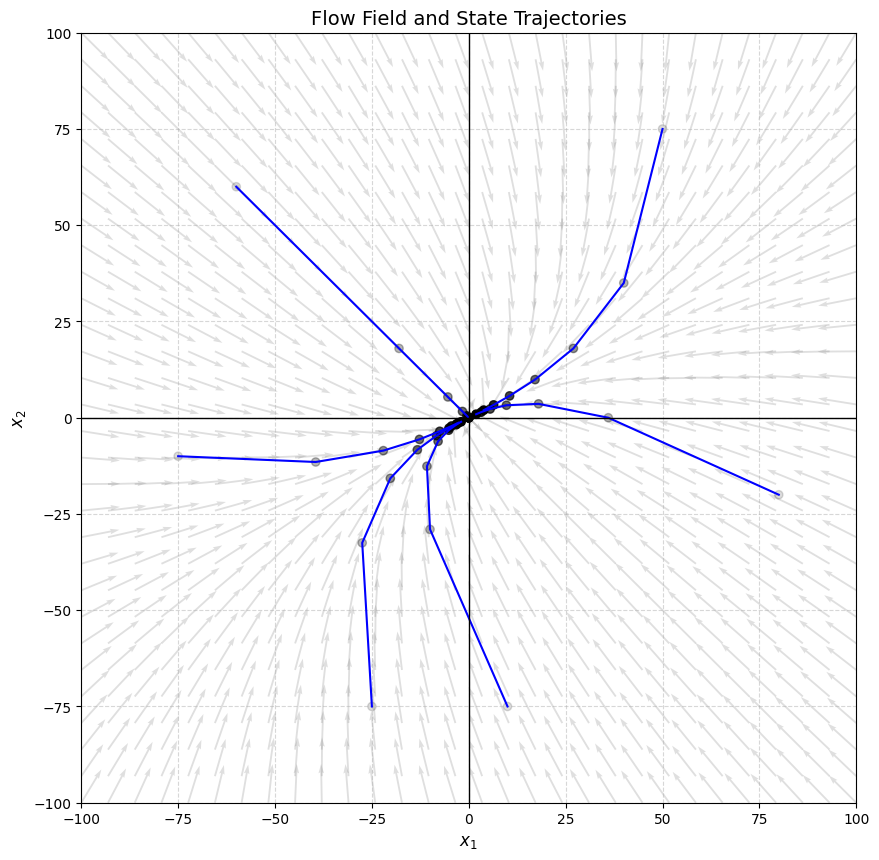

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define the system
A = np.array([[0.5, 0.2],
              [0.1, 0.4]])

def iterate_system(A, x0, steps):
    x = x0
    results = [x0.flatten()]
    for _ in range(steps):
        x = A @ x
        results.append(x.flatten())
    return np.array(results)

# Initial states for trajectories
initial_states = [
    np.array([[0.0], [0.0]]),
    np.array([[50.0], [75.0]]),
    np.array([[-60.0], [60.0]]),
    np.array([[-75.0], [-10]]),
    np.array([[-25.0], [-75]]),
    np.array([[80.0], [-20]]),
    np.array([[10.0], [-75]]),
]
steps = 6

# Set up the plot
plt.figure(figsize=(10, 10))

# Flow field: grid of points and their update directions
x_vals = np.linspace(-100, 100, 30)
y_vals = np.linspace(-100, 100, 30)
X, Y = np.meshgrid(x_vals, y_vals)

U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([[X[i, j]], [Y[i, j]]])
        new_vec = A @ vec
        diff = new_vec - vec
        U[i, j], V[i, j] = diff.flatten()

# Normalize vectors for display
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude + 1e-8
V /= magnitude + 1e-8

plt.quiver(X, Y, U, V, angles='xy', scale=20, color='gray', alpha=0.25)

# Plot solution trajectories
for x0 in initial_states:
    states = iterate_system(A, x0, steps)
    states = np.hstack((states, np.array(list(range(steps + 1))).reshape(-1, 1)))
    plt.plot(states[:, 0], states[:, 1], color = "blue")
    plt.scatter(x = states[:, 0], y = states[:, 1], color = "black", alpha = (states[:, 2] + 1)/(steps + 1))

# Eigenvectors (scaled for visibility)
#plt.arrow(0, 0, 40, 20, head_width=4, head_length=6, fc='black', ec='black')
#plt.text(55, 15, 'Eigenvector ~ [2, 1]', fontsize=10)

#plt.arrow(0, 0, -20, 20, head_width=4, head_length=6, fc='gray', ec='gray')
#plt.text(-100, 30, 'Other eigenvector', fontsize=10, color='gray')

# Formatting
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.title('Flow Field and State Trajectories', fontsize=14)
#plt.axis('equal')

plt.show()


#### $A_4$

As in previous scenarios, we focus on the eigenvectors and eigenvalues of $A_4 = \begin{bmatrix} 1.2 & 0.3\\ 0.1 & 1.1\end{bmatrix}$ since they tell us the full story of the solution sequences.

In [ ]:
# @title
A = np.array([[1.2, 0.3],
              [0.1, 1.1]])

A_eig = np.linalg.eig(A)

for i in range(len(A_eig)):
    print(f"Eigenvalue: {A_eig[0][i]}")
    print(f"Eigenvector: {A_eig[1][:, i]}")

Eigenvalue: 1.3302775637731994
Eigenvector: [0.91724574 0.3983218 ]
Eigenvalue: 0.9697224362268005
Eigenvector: [-0.79325185  0.60889368]


Notice that we have two real eigenvectors again. One has magnitude exceeding $1$ and the other has magnitude slightly below $1$. As was the case with the transition matrix $A_1$, the fixed point at $\vec{0}$ is an attractor for any initial state vector in the eigenspace corresponding to the eigenvalue whose magnitude is below $1$. All other initial states are repelled by that fixed point. Initial states in the eigenspace $E_{\lambda \approx 1.33}$ will remain in that eigenspace, while all other initial states will result in solution sequences approaching (but not entering) this eigenspace, in limit.

Of interest may be the fact that solution sequences resulting from initial states in the eigenspace $E_{\lambda = 0.96972\cdots}$ approach the steady state at $\vec{0}$ very slowly. This is because of how clodse the magnitude of the eigenvalue is to $1$.

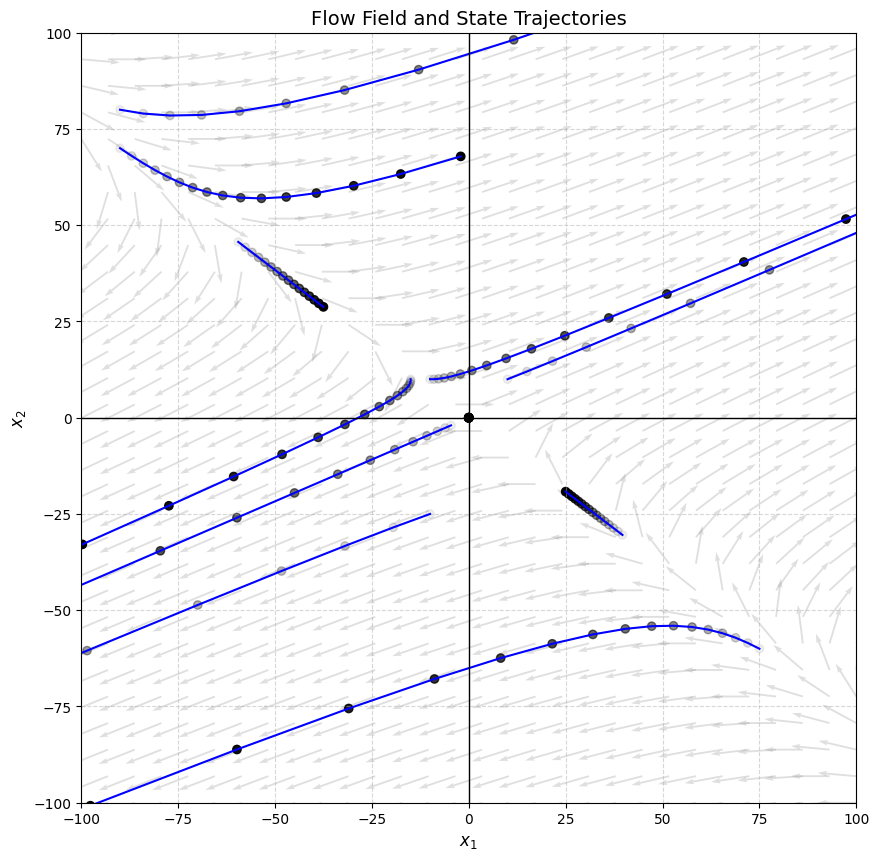

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define the system
A = np.array([[1.2, 0.3],
              [0.1, 1.1]])

def iterate_system(A, x0, steps):
    x = x0
    results = [x0.flatten()]
    for _ in range(steps):
        x = A @ x
        results.append(x.flatten())
    return np.array(results)

# Initial states for trajectories
initial_states = [
    np.array([[0.0], [0.0]]),
    np.array([[75.0], [-60.0]]),
    np.array([[-10.0], [-25.0]]),
    np.array([[10.0], [10]]),
    np.array([[-90.0], [70]]),
    np.array([[-90.0], [80]]),
    np.array([[-15.0], [10]]),
    np.array([[-10.0], [10]]),
    75*np.array([[-0.79325185], [0.60889368]]),
    -50*np.array([[-0.79325185], [0.60889368]]),
    -5*np.array([[0.91724574], [0.3983218]]),
]
steps = 15

# Set up the plot
plt.figure(figsize=(10, 10))

# Flow field: grid of points and their update directions
x_vals = np.linspace(-100, 100, 30)
y_vals = np.linspace(-100, 100, 30)
X, Y = np.meshgrid(x_vals, y_vals)

U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([[X[i, j]], [Y[i, j]]])
        new_vec = A @ vec
        diff = new_vec - vec
        U[i, j], V[i, j] = diff.flatten()

# Normalize vectors for display
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude + 1e-8
V /= magnitude + 1e-8

plt.quiver(X, Y, U, V, angles='xy', scale=20, color='gray', alpha=0.25)

# Plot solution trajectories
for x0 in initial_states:
    states = iterate_system(A, x0, steps)
    states = np.hstack((states, np.array(list(range(steps + 1))).reshape(-1, 1)))
    plt.plot(states[:, 0], states[:, 1], color = "blue")
    plt.scatter(x = states[:, 0], y = states[:, 1], color = "black", alpha = (states[:, 2] + 1)/(steps + 1))

# Eigenvectors (scaled for visibility)
#plt.arrow(0, 0, 40, 20, head_width=4, head_length=6, fc='black', ec='black')
#plt.text(55, 15, 'Eigenvector ~ [2, 1]', fontsize=10)

#plt.arrow(0, 0, -20, 20, head_width=4, head_length=6, fc='gray', ec='gray')
#plt.text(-100, 30, 'Other eigenvector', fontsize=10, color='gray')

# Formatting
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.title('Flow Field and State Trajectories', fontsize=14)
#plt.axis('equal')

plt.show()


#### $A_5$

Finally, we'll examine the state transition matrix $A_5 = \begin{bmatrix} 0.8 & -0.6\\ 0.1 & 0.8\end{bmatrix}$ in the same way that we've examined the others.

In [ ]:
# @title
A = np.array([[0.8, -0.6],
              [0.1, 0.8]])

A_eig = np.linalg.eig(A)

for i in range(len(A_eig)):
    print(f"Eigenvalue: {A_eig[0][i]}")
    print(f"Eigenvector: {A_eig[1][:, i]}")

Eigenvalue: (0.8+0.24494897427831783j)
Eigenvector: [0.9258201+0.j         0.       -0.37796447j]
Eigenvalue: (0.8-0.24494897427831783j)
Eigenvector: [0.9258201-0.j         0.       +0.37796447j]


Notice the presence of the complex eigenvalues here! This indicates rotation around the fixed point. As in all of the previous cases, the magnitude of the eigenvalue determines the character of the solution states.

Since both eigenvalues $\lambda_1 \approx 0.8 + 0.25i$ and $\lambda_2 \approx 0.8 - 0.25i$ have magnitude below $1$ ($\displaystyle{\sqrt{0.8^2 + 0.25^2} < 1}$), the fixed point at $\vec{0}$ is an attractor for all initial states!

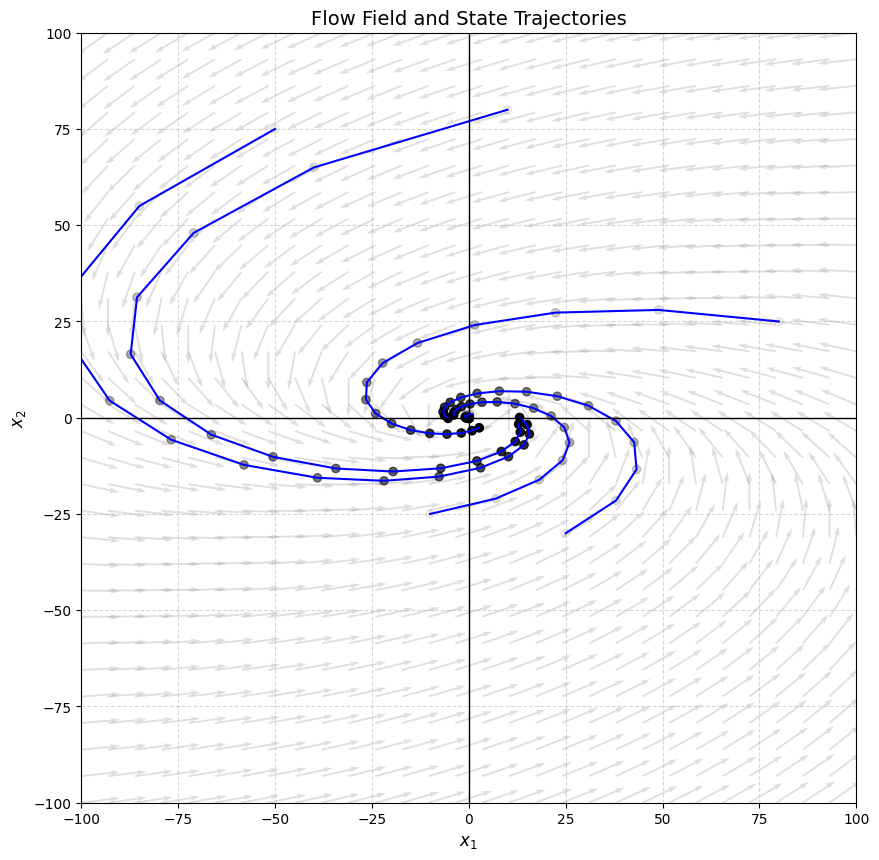

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define the system
A = np.array([[0.8, -0.6],
              [0.1, 0.8]])

def iterate_system(A, x0, steps):
    x = x0
    results = [x0.flatten()]
    for _ in range(steps):
        x = A @ x
        results.append(x.flatten())
    return np.array(results)

# Initial states for trajectories
initial_states = [
    np.array([[0.0], [0.0]]),
    np.array([[10.0], [80.0]]),
    np.array([[-10.0], [-25.0]]),
    np.array([[1.0], [1]]),
    np.array([[25.0], [-30]]),
    np.array([[-50.0], [75]]),
    np.array([[80.0], [25]]),
]
steps = 15

# Set up the plot
plt.figure(figsize=(10, 10))

# Flow field: grid of points and their update directions
x_vals = np.linspace(-100, 100, 30)
y_vals = np.linspace(-100, 100, 30)
X, Y = np.meshgrid(x_vals, y_vals)

U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([[X[i, j]], [Y[i, j]]])
        new_vec = A @ vec
        diff = new_vec - vec
        U[i, j], V[i, j] = diff.flatten()

# Normalize vectors for display
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude + 1e-8
V /= magnitude + 1e-8

plt.quiver(X, Y, U, V, angles='xy', scale=20, color='gray', alpha=0.25)

# Plot solution trajectories
for x0 in initial_states:
    states = iterate_system(A, x0, steps)
    states = np.hstack((states, np.array(list(range(steps + 1))).reshape(-1, 1)))
    plt.plot(states[:, 0], states[:, 1], color = "blue")
    plt.scatter(x = states[:, 0], y = states[:, 1], color = "black", alpha = (states[:, 2] + 1)/(steps + 1))

# Eigenvectors (scaled for visibility)
#plt.arrow(0, 0, 40, 20, head_width=4, head_length=6, fc='black', ec='black')
#plt.text(55, 15, 'Eigenvector ~ [2, 1]', fontsize=10)

#plt.arrow(0, 0, -20, 20, head_width=4, head_length=6, fc='gray', ec='gray')
#plt.text(-100, 30, 'Other eigenvector', fontsize=10, color='gray')

# Formatting
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.title('Flow Field and State Trajectories', fontsize=14)
#plt.axis('equal')

plt.show()


**Task 3:** Make slight changes to the transition matrices above. How do your changes impact the character of the solution trajectories?

**Application (Activity 4.4.5 from the text):** We are going to conduct an analysis to study the population of a bison herd. We divide the population of female bison into three groups: *juveniles* who are less than one year old; *yearlings* between one and two years old; and *adults* who are older than two years.

Each year,

+ 80% of the juveniles survive to become yearlings.
+ 90% of the yearlings survive to become adults.
+ 80% of the adults survive.
+ 40% of the adults give birth to a juvenile.

We let $J_k$, $Y_k$, and $A_k$ denote, respectively, the number of *juveniles*, *yearlings*, and *adults* in the population in year $k$. We write the vector $\vec{x_k} = \begin{bmatrix} J_k\\ Y_k\\ A_k\end{bmatrix}$ to store the population distribution in year $k$.

1. Write the state transition matrix $A$ which can be used to obtain $\vec{x_{k+1}}$ from $\vec{x_k}$.
2. Determine the fixed points for the discrete dynamical system $\vec{x_{k+1}} = A\vec{x_k}$. That is find the vector(s) $\vec{x^*}$ satisfying $A\vec{x^*} = \vec{x^*}$.
3. Find the eigenvalues and eigenvectors for the transition matrix $A$.
4. Use what you know about the behavior of two-dimensional systems to conjecture the behavior of this three-dimensional system.
5. Suppose that the birth rate decreases so that only 30% of adults give birth to a juvenile. How does this affect the long-term growth rate of the herd?
6. Suppose that the birth rate decreases further so that only 20% of adults give birth to a juvenile. How does this affect the long-term growth rate of the herd?
7. Find the smallest birth rate that supports a stable population.

